# Testing the Calculation Without Parameter Uncertanties

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [35]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
from corner import corner
import h5py
import model
import multiprocessing as multi
import pymc3 as pm
import scipy.stats as ss
import seaborn as sns
import theano.tensor as tt

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [3]:
with h5py.File('observations.h5', 'r') as f:
    Nobs, Tobs = f.attrs['5yr']
    Nobs = int(round(Nobs))
    m1s = array(f['m1s'])[:Nobs]
    m2s = array(f['m2s'])[:Nobs]
    zs = array(f['zs'])[:Nobs]
    dls = Planck15.luminosity_distance(zs).to(u.Gpc).value[:Nobs]    

In [4]:
with h5py.File('selected.h5', 'r') as f:
    m1s_det = array(f['m1det'])
    m2s_det = array(f['m2det'])
    dls_det = array(f['dl'])
    wts_det = array(f['wt'])
    N_gen = f.attrs['N_gen']

I got convergence with the ``small`` sample for ``1 << 11`` and ``1 << 12`` below (shift is $< \sigma/2$, at least).  Moving to 1 year, we have 12 times as many samples, so we should increase by 16 ($2^4$), or 15 and 16 in the shift.  In fact, we see convergence in 1 year at ``1 << 15`` and ``1 << 16``.  That suggests that we might have convergence at 5 years by ``1 << 17`` and ``1 << 18``.

In [69]:
1<<19

524288

In [10]:
ndet = 1 << 17
fdet = float(ndet)/float(m1s_det.shape[0])
mod1 = model.make_model(reshape(m1s*(1+zs), (-1, 1)), reshape(m2s*(1+zs), (-1, 1)), reshape(dls, (-1, 1)), m1s_det[:ndet], m2s_det[:ndet], dls_det[:ndet], wts_det[:ndet], int(round(N_gen*fdet)), Tobs)

In [11]:
ndet = 1 << 18
fdet = float(ndet)/float(m1s_det.shape[0])
mod2 = model.make_model(reshape(m1s*(1+zs), (-1, 1)), reshape(m2s*(1+zs), (-1, 1)), reshape(dls, (-1, 1)), m1s_det[:ndet], m2s_det[:ndet], dls_det[:ndet], wts_det[:ndet], int(round(N_gen*fdet)), Tobs)

In [12]:
d0 = {mod1.R0: 100.0, 
      mod1.alpha: 0.75,
      mod1.beta: 0.0,
      mod1.gamma: 3.0,
      mod1.MMin: 5.0,
      mod1.MMax: 40.0,
      mod1.sigma_low: 0.1,
      mod1.sigma_high: 0.1,
      mod1.H0: 70,
      mod1.Om: 0.3,
      mod1.w: -1}

In [13]:
m1s.shape[0], mod1.mu_N_det.eval(d0), mod1.sigma_N_det.eval(d0), mod1.neff_det.eval(d0)

(4507, array([4489.88130544]), array([27.92928008]), array([25843.43499747]))

In [14]:
t1 = model.sample(mod1, 1000, 1000, 4)
t2 = model.sample(mod2, 1000, 1000, 4)

Only 2 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 4 chains: 100%|██████████| 108/108 [02:49<00:00,  4.50s/draws]
Only 2 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 4 chains: 100%|██████████| 208/208 [18:34<00:00, 12.30s/draws]
Only 2 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 4 chains: 100%|██████████| 408/408 [07:44<00:00,  2.34s/draws]
Only 2 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 4 chains: 100%|██████████| 808/808 [08:26<00:00,  1.86draws/s]
Only 2 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, H0

In [15]:
truth = {'R0': 100, 'alpha': 0.75, 'beta': 0.0, 'gamma': 3.0, 'sigma_low':0.1, 'sigma_high': 0.1, 
         'MMin': 5.0, 'MMax': 40.0,
         'H0': Planck15.H0.to(u.km/u.s/u.Mpc).value, 'Om': Planck15.Om0, 'w':-1}

/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c5cdf8d68>,
      dtype=object)

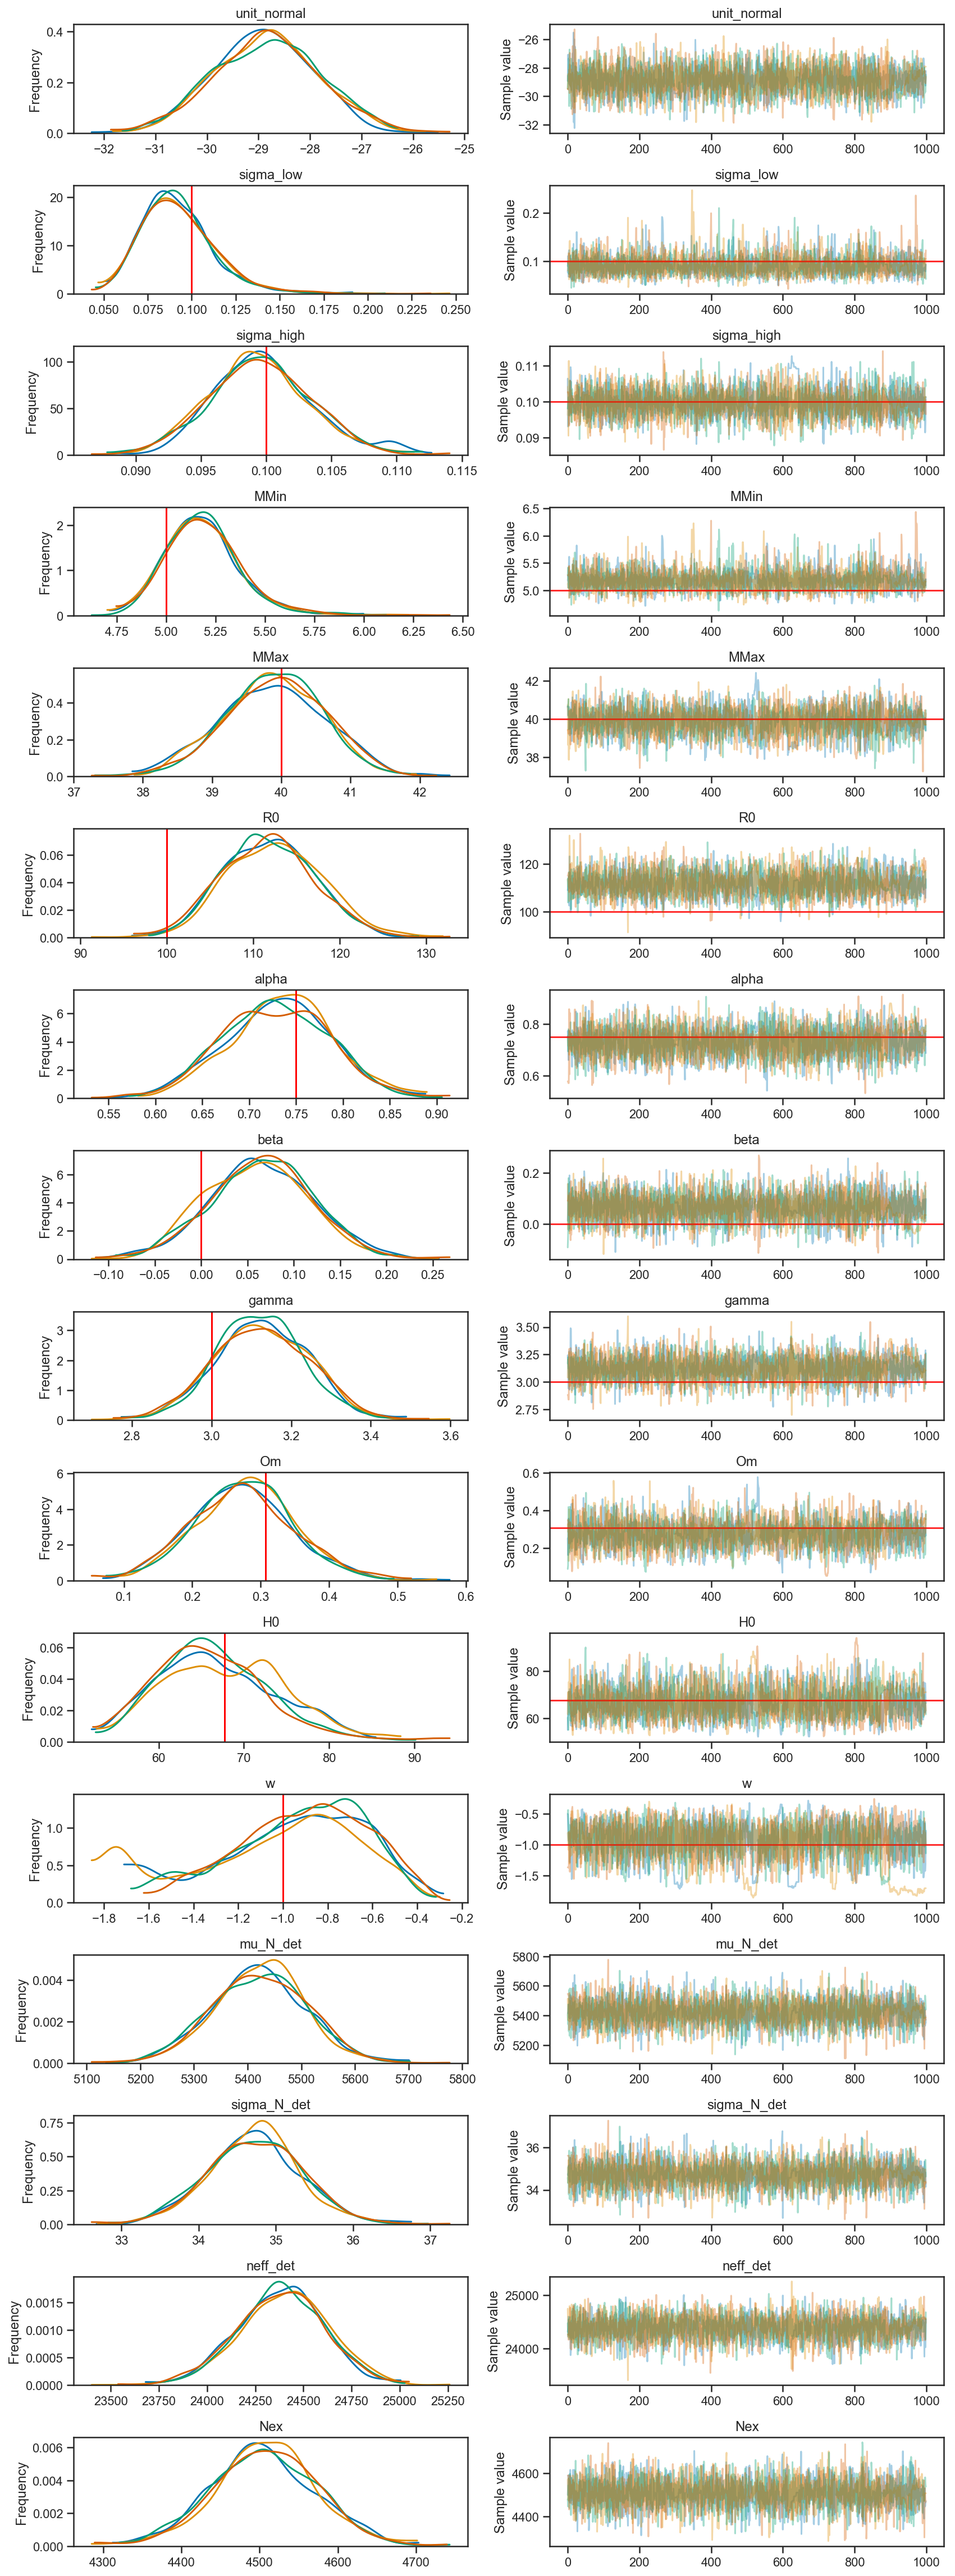

In [16]:
pm.traceplot(t1, lines=truth)

In [17]:
pm.summary(t1)

mean          sd  mc_error       hpd_2.5  \
unit_normal       -28.867110    0.996650  0.021810    -30.817021   
sigma_low           0.091986    0.020877  0.000454      0.053489   
sigma_high          0.099565    0.003836  0.000099      0.092135   
MMin                5.186221    0.193195  0.003968      4.821484   
MMax               39.880631    0.716470  0.019756     38.449655   
R0                111.876734    5.266313  0.120148    101.809172   
alpha               0.729997    0.055772  0.001273      0.623655   
beta                0.063416    0.054887  0.001241     -0.039169   
gamma               3.123330    0.115221  0.002645      2.899958   
Om                  0.274154    0.073673  0.001654      0.132017   
H0                 66.861682    6.886968  0.224335     54.504161   
w                  -0.964070    0.332922  0.017085     -1.632775   
mu_N_det__0      5420.759545   86.749450  1.327397   5252.922251   
sigma_N_det__0     34.714969    0.595395  0.008615     33.484567   
neff_det__0     24384.941414  224.941965  3.829767  23947.702892   
Nex__0           4505.704102   65.844504  1.031077   4371.975283   

                    hpd_97.5        n_eff      Rhat  
unit_normal       -26.944725  1893.667560  1.000670  
sigma_low           0.130601  2313.077356  0.999802  
sigma_high          0.107163  1141.097787  1.001543  
MMin                5.563555  2315.616604  1.000616  
MMax               41.225261  1294.857932  1.000271  
R0                121.955197  2017.673305  1.003002  
alpha               0.839491  1416.230336  1.002535  
beta                0.172484  1554.447922  1.001093  
gamma               3.343478  1786.462735  0.999919  
Om                  0.421408  1590.791713  1.000773  
H0                 80.113632   752.527075  1.006616  
w                  -0.373224   170.489253  1.020392  
mu_N_det__0      5592.852856  4262.745292  0.999720  
sigma_N_det__0     35.800894  4583.723674  0.999767  
neff_det__0     24826.590000  3587.630038  1.001307  
Nex__0           4630.463030  4203.665426  1.000157

/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c6ee0a828>,
      dtype=object)

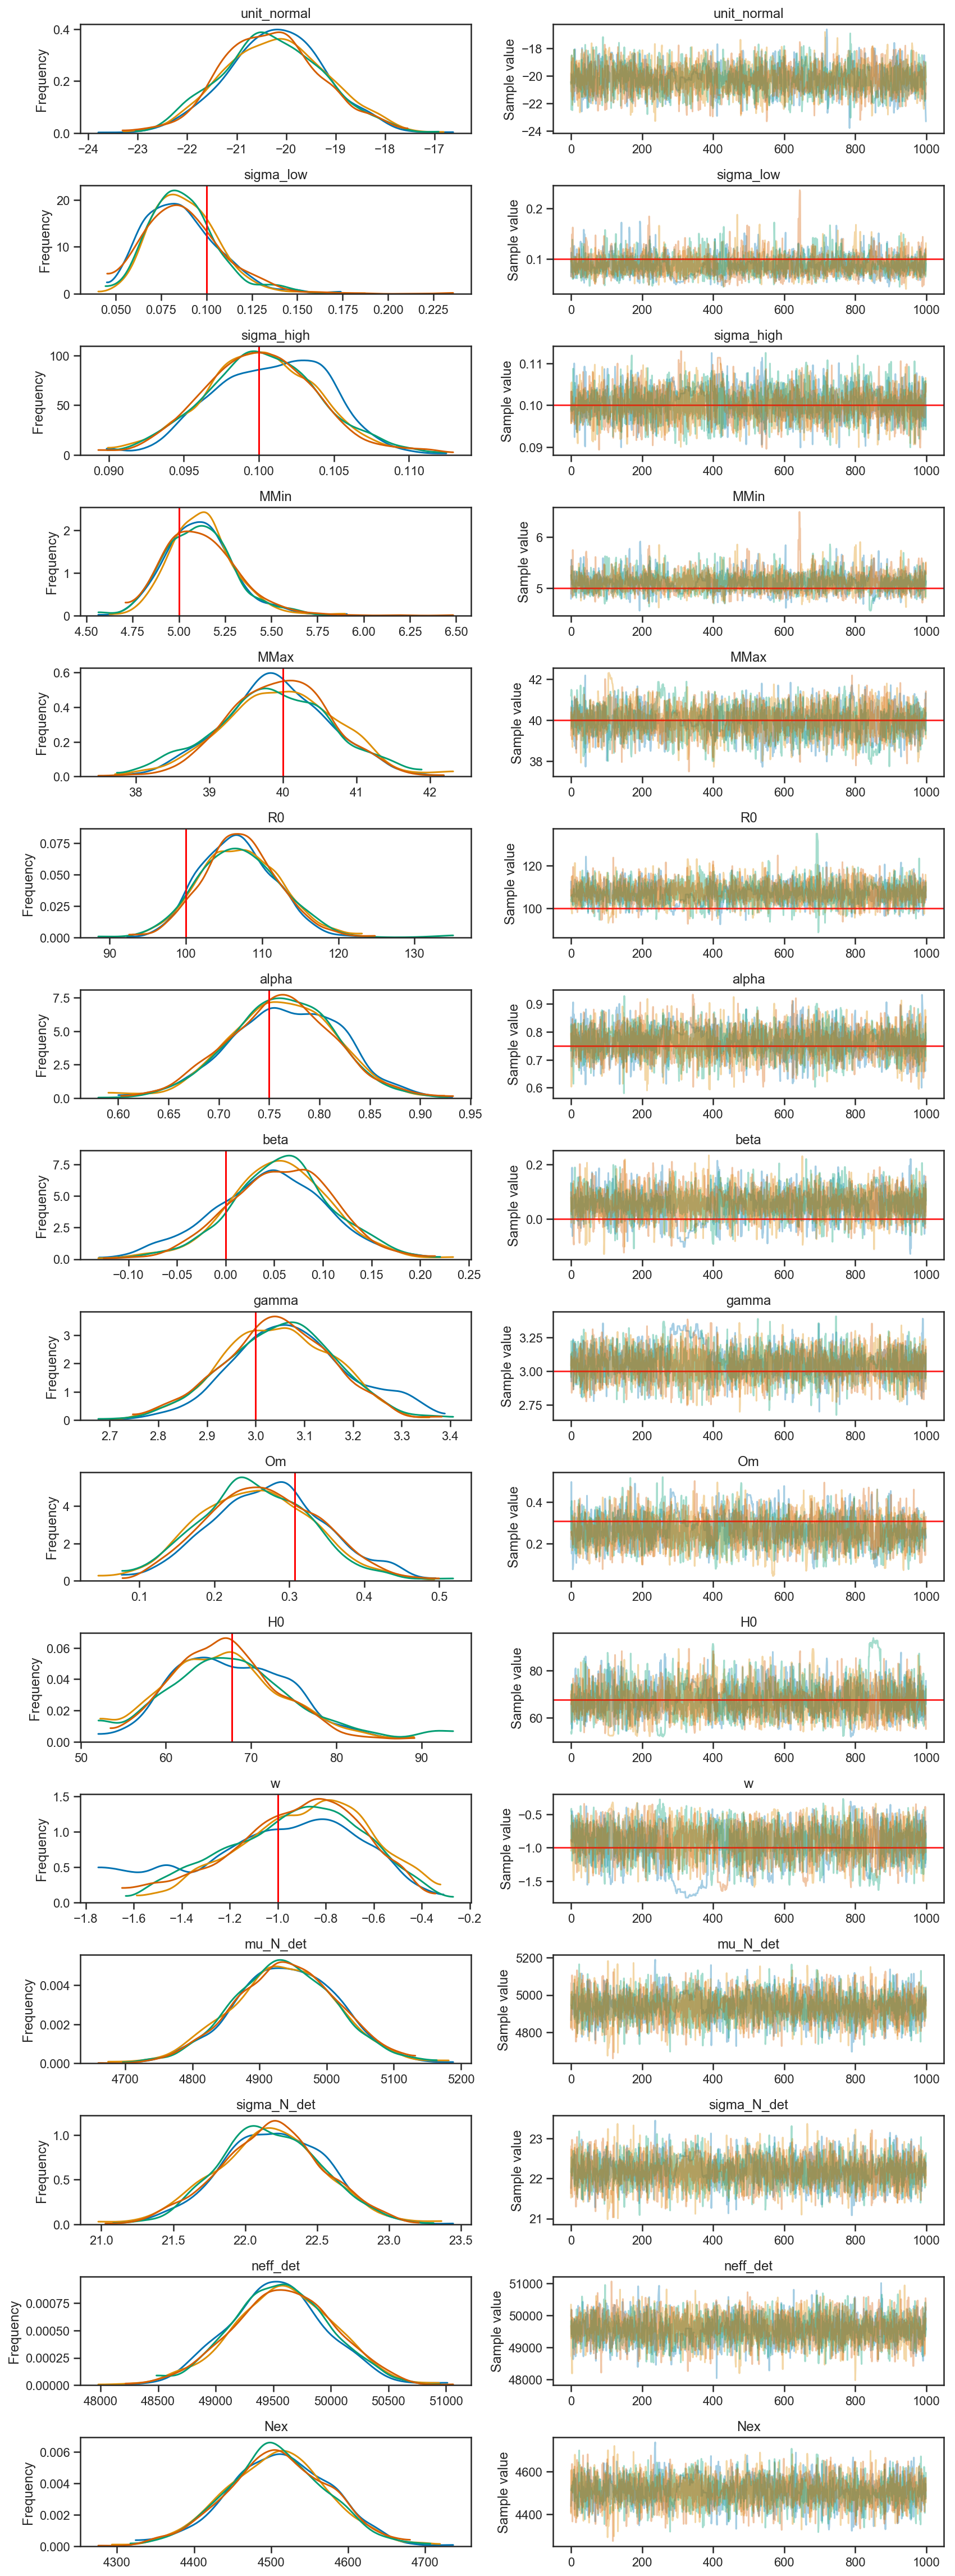

In [18]:
pm.traceplot(t2, lines=truth)

In [19]:
pm.summary(t2)

mean          sd  mc_error       hpd_2.5  \
unit_normal       -20.255078    1.006732  0.021910    -22.103038   
sigma_low           0.087578    0.020490  0.000571      0.051739   
sigma_high          0.100290    0.003803  0.000099      0.092980   
MMin                5.117233    0.187449  0.004604      4.777481   
MMax               39.923964    0.739256  0.022628     38.532712   
R0                106.974696    5.094137  0.117838     97.386075   
alpha               0.762875    0.052954  0.001142      0.659778   
beta                0.053608    0.054043  0.001654     -0.049106   
gamma               3.053906    0.115208  0.004217      2.819310   
Om                  0.261891    0.075694  0.002410      0.107228   
H0                 67.473060    7.113592  0.262190     54.189515   
w                  -0.937573    0.295879  0.014229     -1.529090   
mu_N_det__0      4937.181850   76.080102  1.543585   4791.470098   
sigma_N_det__0     22.176916    0.359929  0.007597     21.471629   
neff_det__0     49565.952466  428.998534  8.581702  48712.118043   
Nex__0           4507.750566   65.227846  1.358215   4385.799323   

                    hpd_97.5        n_eff      Rhat  
unit_normal       -18.178908  2434.351693  1.000906  
sigma_low           0.128192  1143.414236  1.000410  
sigma_high          0.107861  1522.731923  1.004241  
MMin                5.500833  1594.495712  1.000517  
MMax               41.425161  1084.099883  1.002004  
R0                116.776664  2398.659458  1.000561  
alpha               0.866872  2365.643511  1.000635  
beta                0.168025   577.904806  1.006151  
gamma               3.279020   343.760036  1.007825  
Om                  0.403998   729.649728  1.008421  
H0                 81.767345   646.307801  1.003545  
w                  -0.408833   199.969474  1.016682  
mu_N_det__0      5085.537765  2294.371066  0.999910  
sigma_N_det__0     22.873840  1931.667933  1.000243  
neff_det__0     50375.955623  2947.260984  1.001323  
Nex__0           4641.942258  2355.919631  1.000032

In [65]:
print('t1 parameter offset term is {:.2f}'.format(std(m1s.shape[0]**2/(2*t1['neff_det']))))
print('t2 parameter offset term is {:.2f}'.format(std(m1s.shape[0]**2/(2*t2['neff_det']))))

t1 parameter offset term is 3.85
t2 parameter offset term is 1.77


In [20]:
def plot_difference(key, t1, t2):
    sns.distplot(t1[key])
    sns.distplot(t2[key])
    
    print('Mean shift is {:.2f} sigma'.format((mean(t1[key]) - mean(t2[key]))/std(t2[key])))

/Users/wfarr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean shift is 0.96 sigma


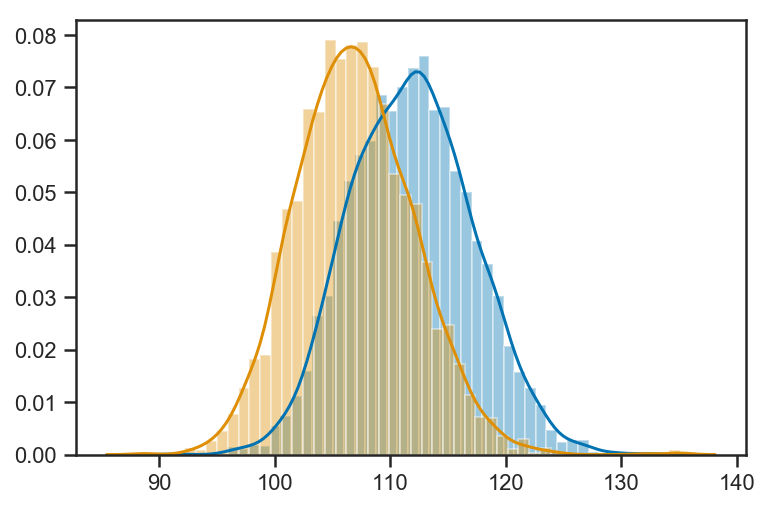

In [21]:
plot_difference('R0', t1, t2)

Mean shift is -0.62 sigma


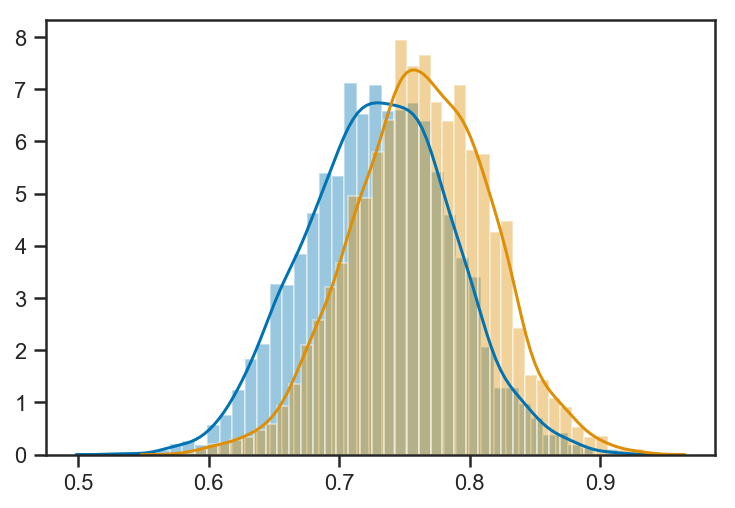

In [22]:
plot_difference('alpha', t1, t2)

Mean shift is 0.18 sigma


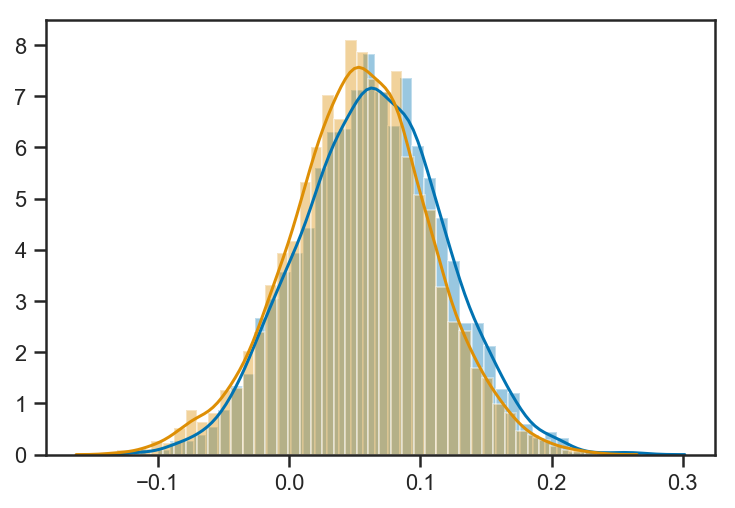

In [23]:
plot_difference('beta', t1, t2)

Mean shift is 0.60 sigma


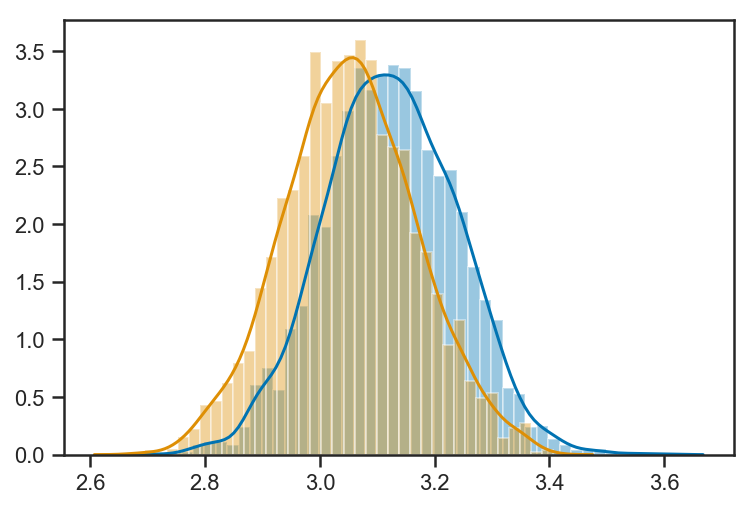

In [24]:
plot_difference('gamma', t1, t2)

Mean shift is 0.37 sigma


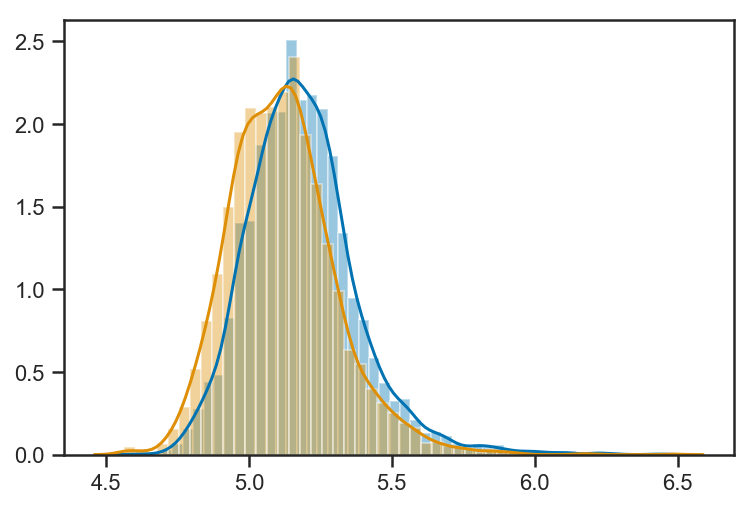

In [25]:
plot_difference('MMin', t1, t2)

Mean shift is -0.06 sigma


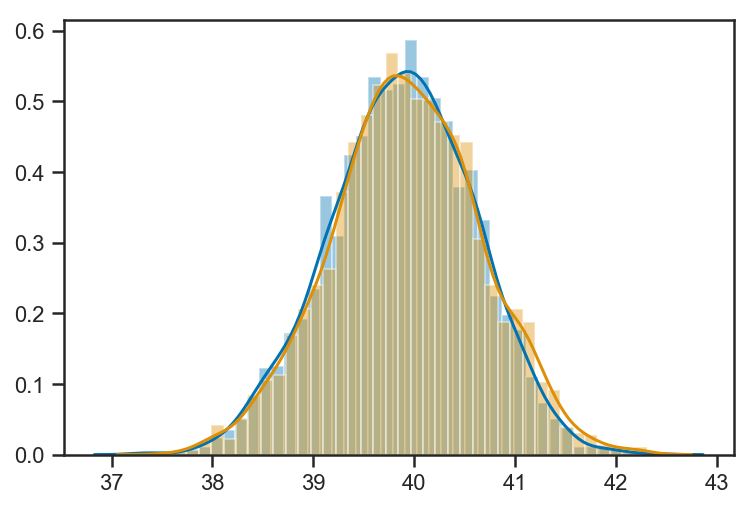

In [26]:
plot_difference('MMax', t1, t2)

Mean shift is -0.09 sigma


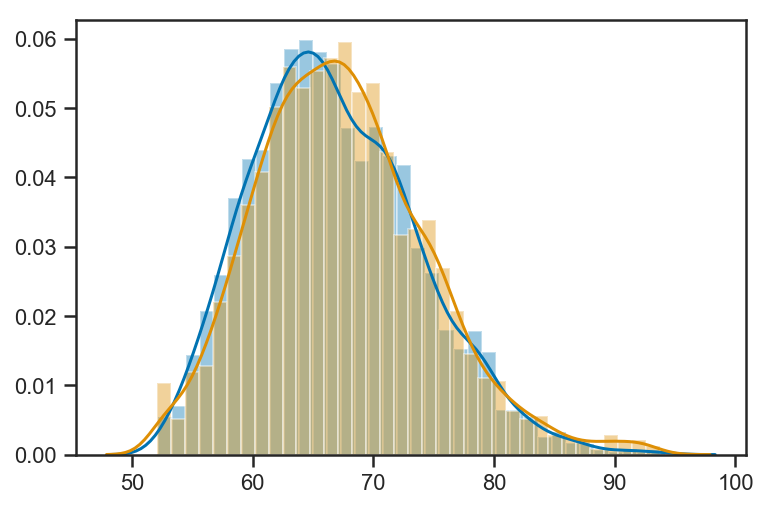

In [27]:
plot_difference('H0', t1, t2)

Mean shift is 0.16 sigma


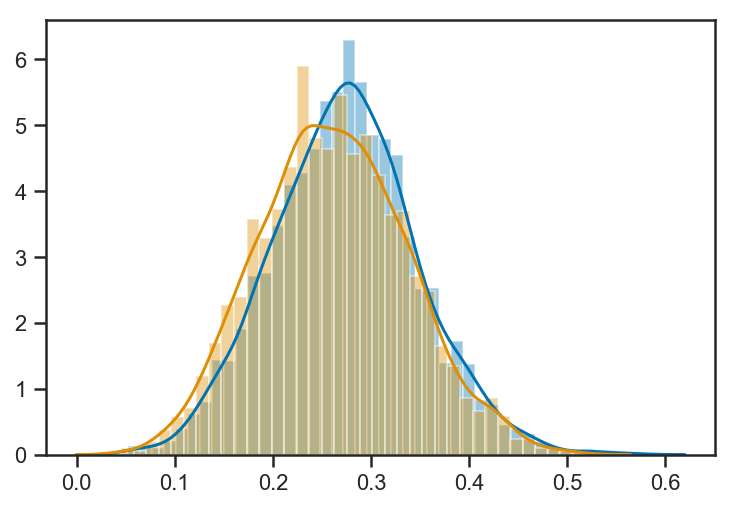

In [28]:
plot_difference('Om', t1, t2)

Mean shift is -0.09 sigma


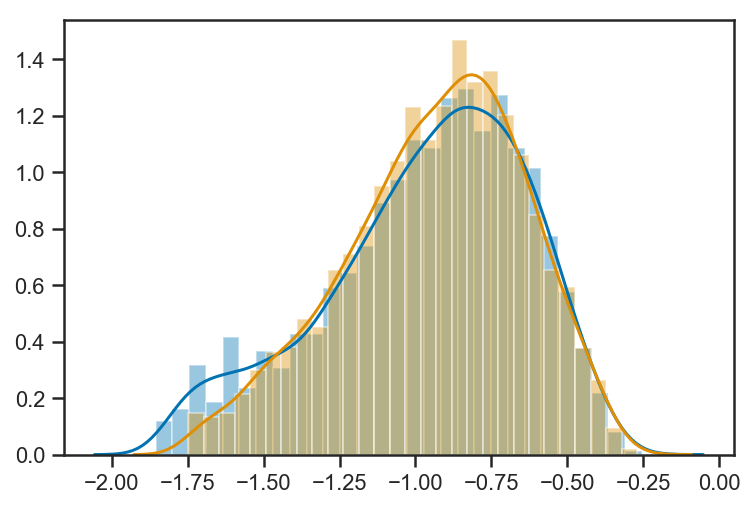

In [29]:
plot_difference('w', t1, t2)

In [30]:
m1s.shape[0]**2/mean(t2['neff_det'])**2*std(t2['neff_det'])

3.547023064491311

In [31]:
m1s.shape[0]**2/mean(t1['neff_det'])**2*std(t1['neff_det'])

7.684262056719442

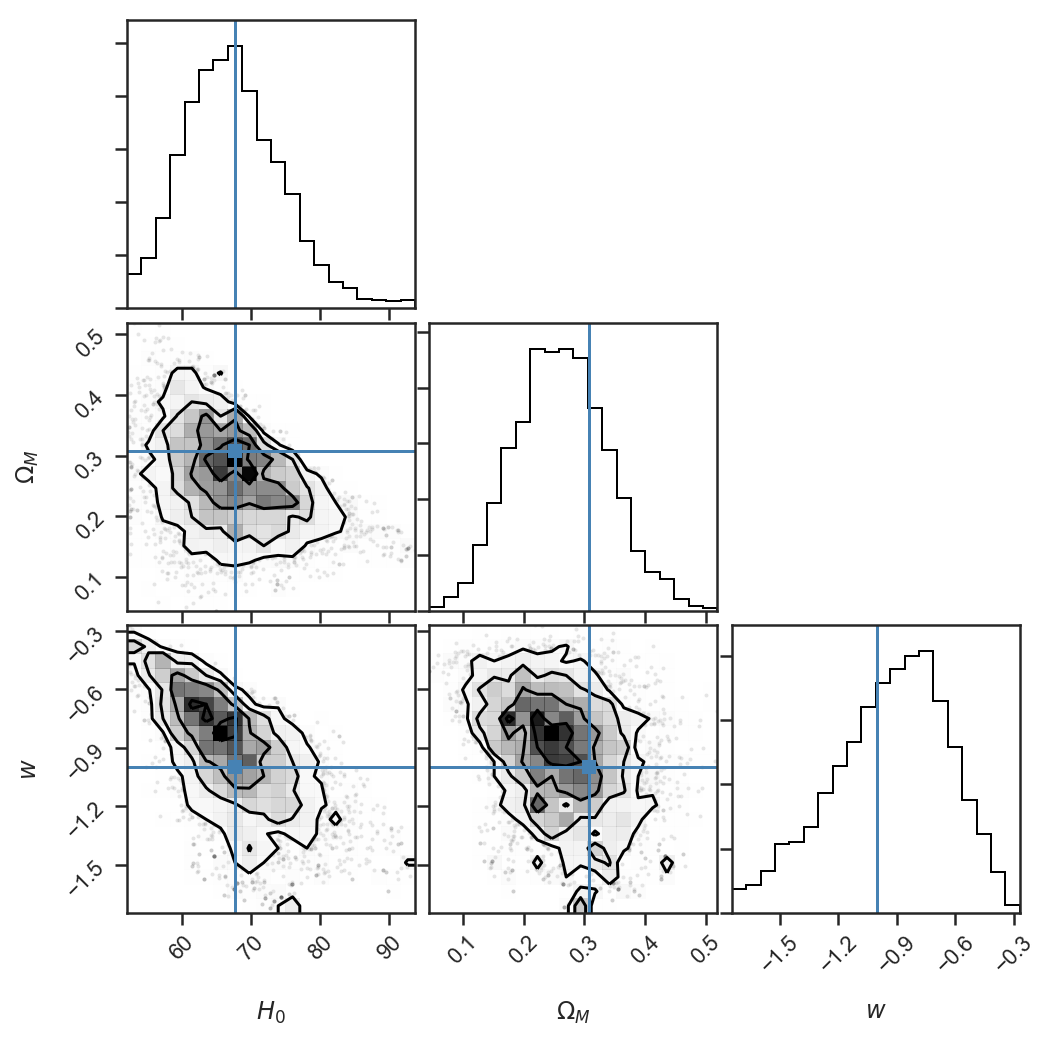

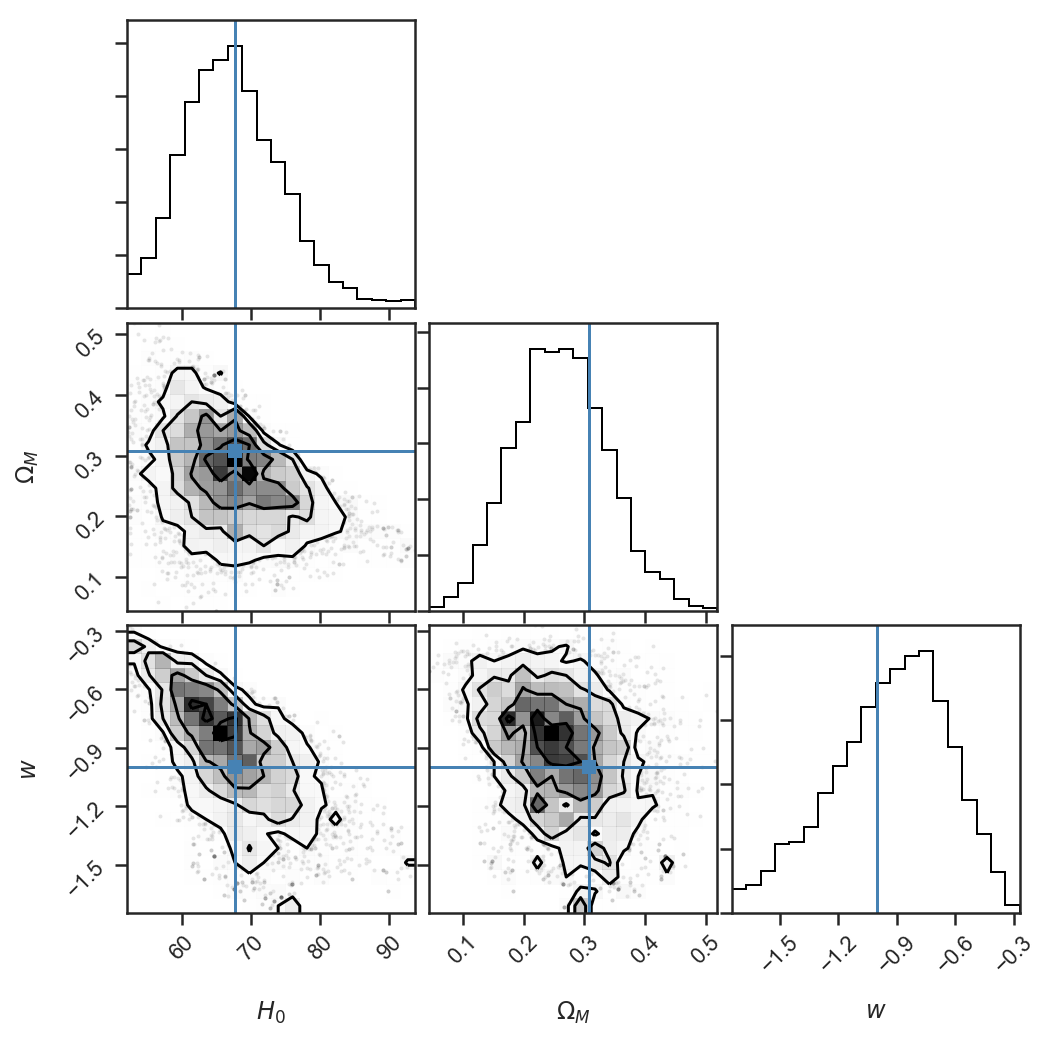

In [34]:
corner(column_stack([t2[k] for k in ['H0', 'Om', 'w']]), 
       labels=[r'$H_0$', r'$\Omega_M$', r'$w$'],
       truths=[Planck15.H0.to(u.km/u.s/u.Mpc).value,
               Planck15.Om0,
               -1])

In [51]:
pts = column_stack((t2['H0'], t2['Om']*(t2['H0']/100)**2, t2['w']))

mu2 = mean(pts, axis=0)
c2 = cov(pts, rowvar=False)
f2 = linalg.inv(c2)

In [58]:
H0 = Planck15.H0.to(u.km/u.s/u.Mpc).value
h0 = H0/100.0

mu_prior = array([H0, Planck15.Om0*h0**2, -1])
c_prior = diag([(0.01*H0)**2, 0.00016**2 + 0.0015**2, np.inf])
f_prior = linalg.inv(c_prior)

In [60]:
f = f2 + f_prior
c = linalg.inv(f)

mu = np.dot(c, np.dot(f_prior, mu_prior)+ np.dot(f2, mu2))

In [61]:
mu, c, sqrt(diag(c))

(array([67.75325098,  0.14104388, -1.09440723]),
 array([[ 4.54340625e-01,  1.53313283e-06, -8.25889413e-03],
        [ 1.53313283e-06,  2.26983192e-06, -1.46718200e-05],
        [-8.25889413e-03, -1.46718200e-05,  1.43882845e-02]]),
 array([0.67404794, 0.0015066 , 0.11995118]))

In [62]:
mu2, mu_prior

(array([67.47305973,  0.11752301, -0.93757346]),
 array([67.74      ,  0.14110276, -1.        ]))